In [10]:
import numpy as np
from bandits import MultiArmedBandit

import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.ticker as mtick

# from multiprocessing import Pool

In [11]:

# font = {'family' : 'normal',
#         # 'weight' : 'bold',
#         'size'   : 22}
# matplotlib.rc('font', **font)

mpl.rcParams['font.size'] = 7
mpl.rcParams['figure.dpi'] = 300

In [12]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [13]:
mab = MultiArmedBandit(k = 10)

time_horizon = 1000
number_of_experiments = 100

greedy = mab.average_behavior(name = '', N = number_of_experiments, T = time_horizon, epsilon = 0)
metrics2 = mab.average_behavior('', N = number_of_experiments, T = time_horizon, epsilon = 0.01)
metrics1 = mab.average_behavior('', N = number_of_experiments, T = time_horizon, epsilon = 0.1)
ucb = mab.average_behavior('', N = number_of_experiments, T = time_horizon, strategy = 'UCB', c = 0.25)

In [83]:
ucb = mab.average_behavior(N = number_of_experiments, T = time_horizon, strategy = 'UCB', c = 1)

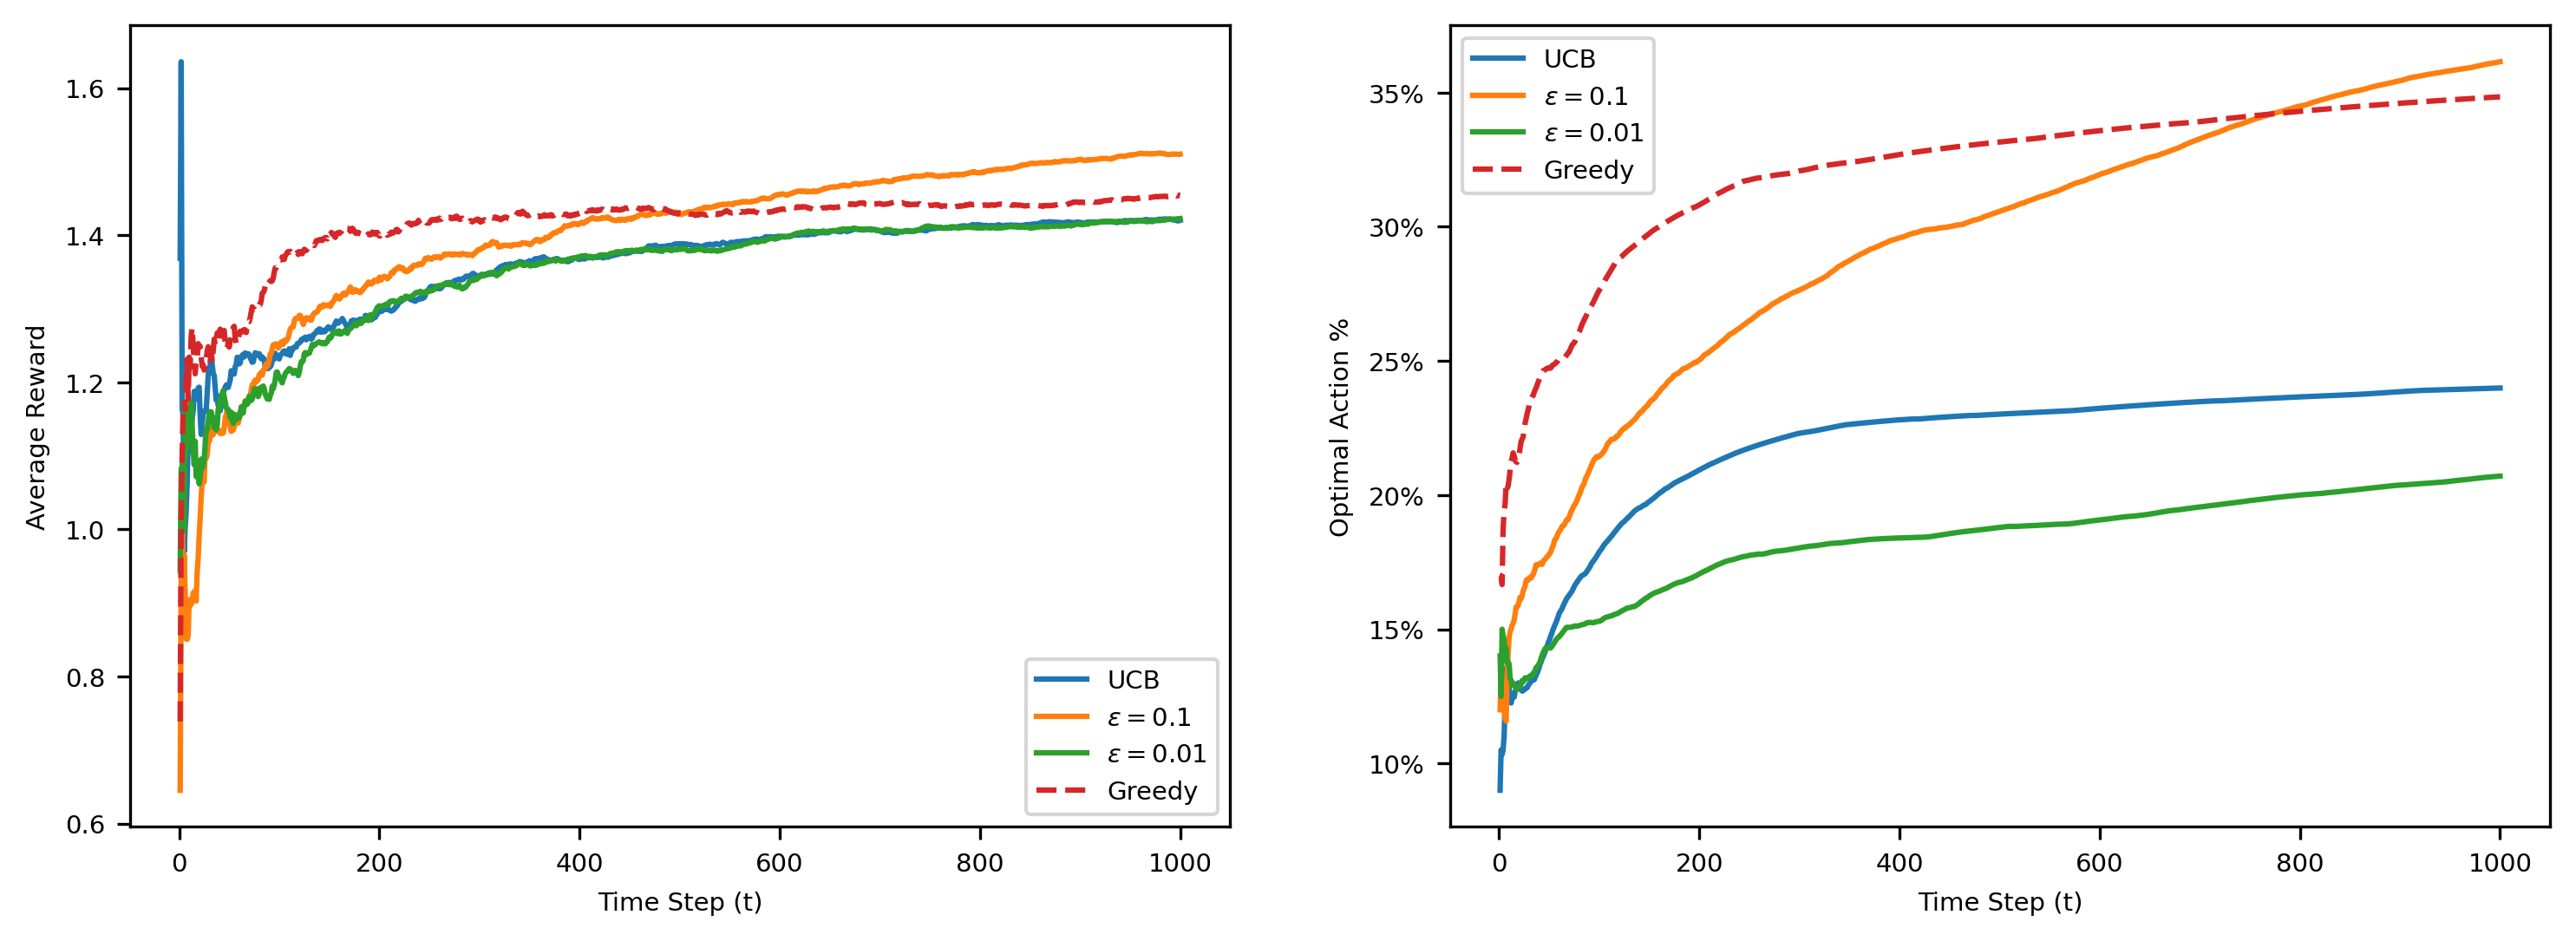

In [14]:
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=False, figsize=(12,4))

ax1.plot(range(1,time_horizon+1), ucb['average_reward'], label='UCB')
ax1.plot(range(1,time_horizon+1), metrics1['average_reward'], label='$\epsilon=0.1$')
ax1.plot(range(1,time_horizon+1), metrics2['average_reward'], label='$\epsilon=0.01$')
ax1.plot(range(1,time_horizon+1), greedy['average_reward'], linestyle = '--', label='Greedy')
ax1.set_ylabel('Average Reward')
ax1.set_xlabel('Time Step (t)')

ax2.plot(range(1,time_horizon+1), ucb['optimal_action'], label='UCB')
ax2.plot(range(1,time_horizon+1), metrics1['optimal_action'], label='$\epsilon=0.1$')
ax2.plot(range(1,time_horizon+1), metrics2['optimal_action'], label='$\epsilon=0.01$')
ax2.plot(range(1,time_horizon+1), greedy['optimal_action'], linestyle = '--', label='Greedy')
ax2.set_ylabel('Optimal Action %')
ax2.set_xlabel('Time Step (t)')
ax2.yaxis.set_major_formatter(mtick.PercentFormatter(1, decimals = 0))

ax1.legend()
ax2.legend()
plt.show()

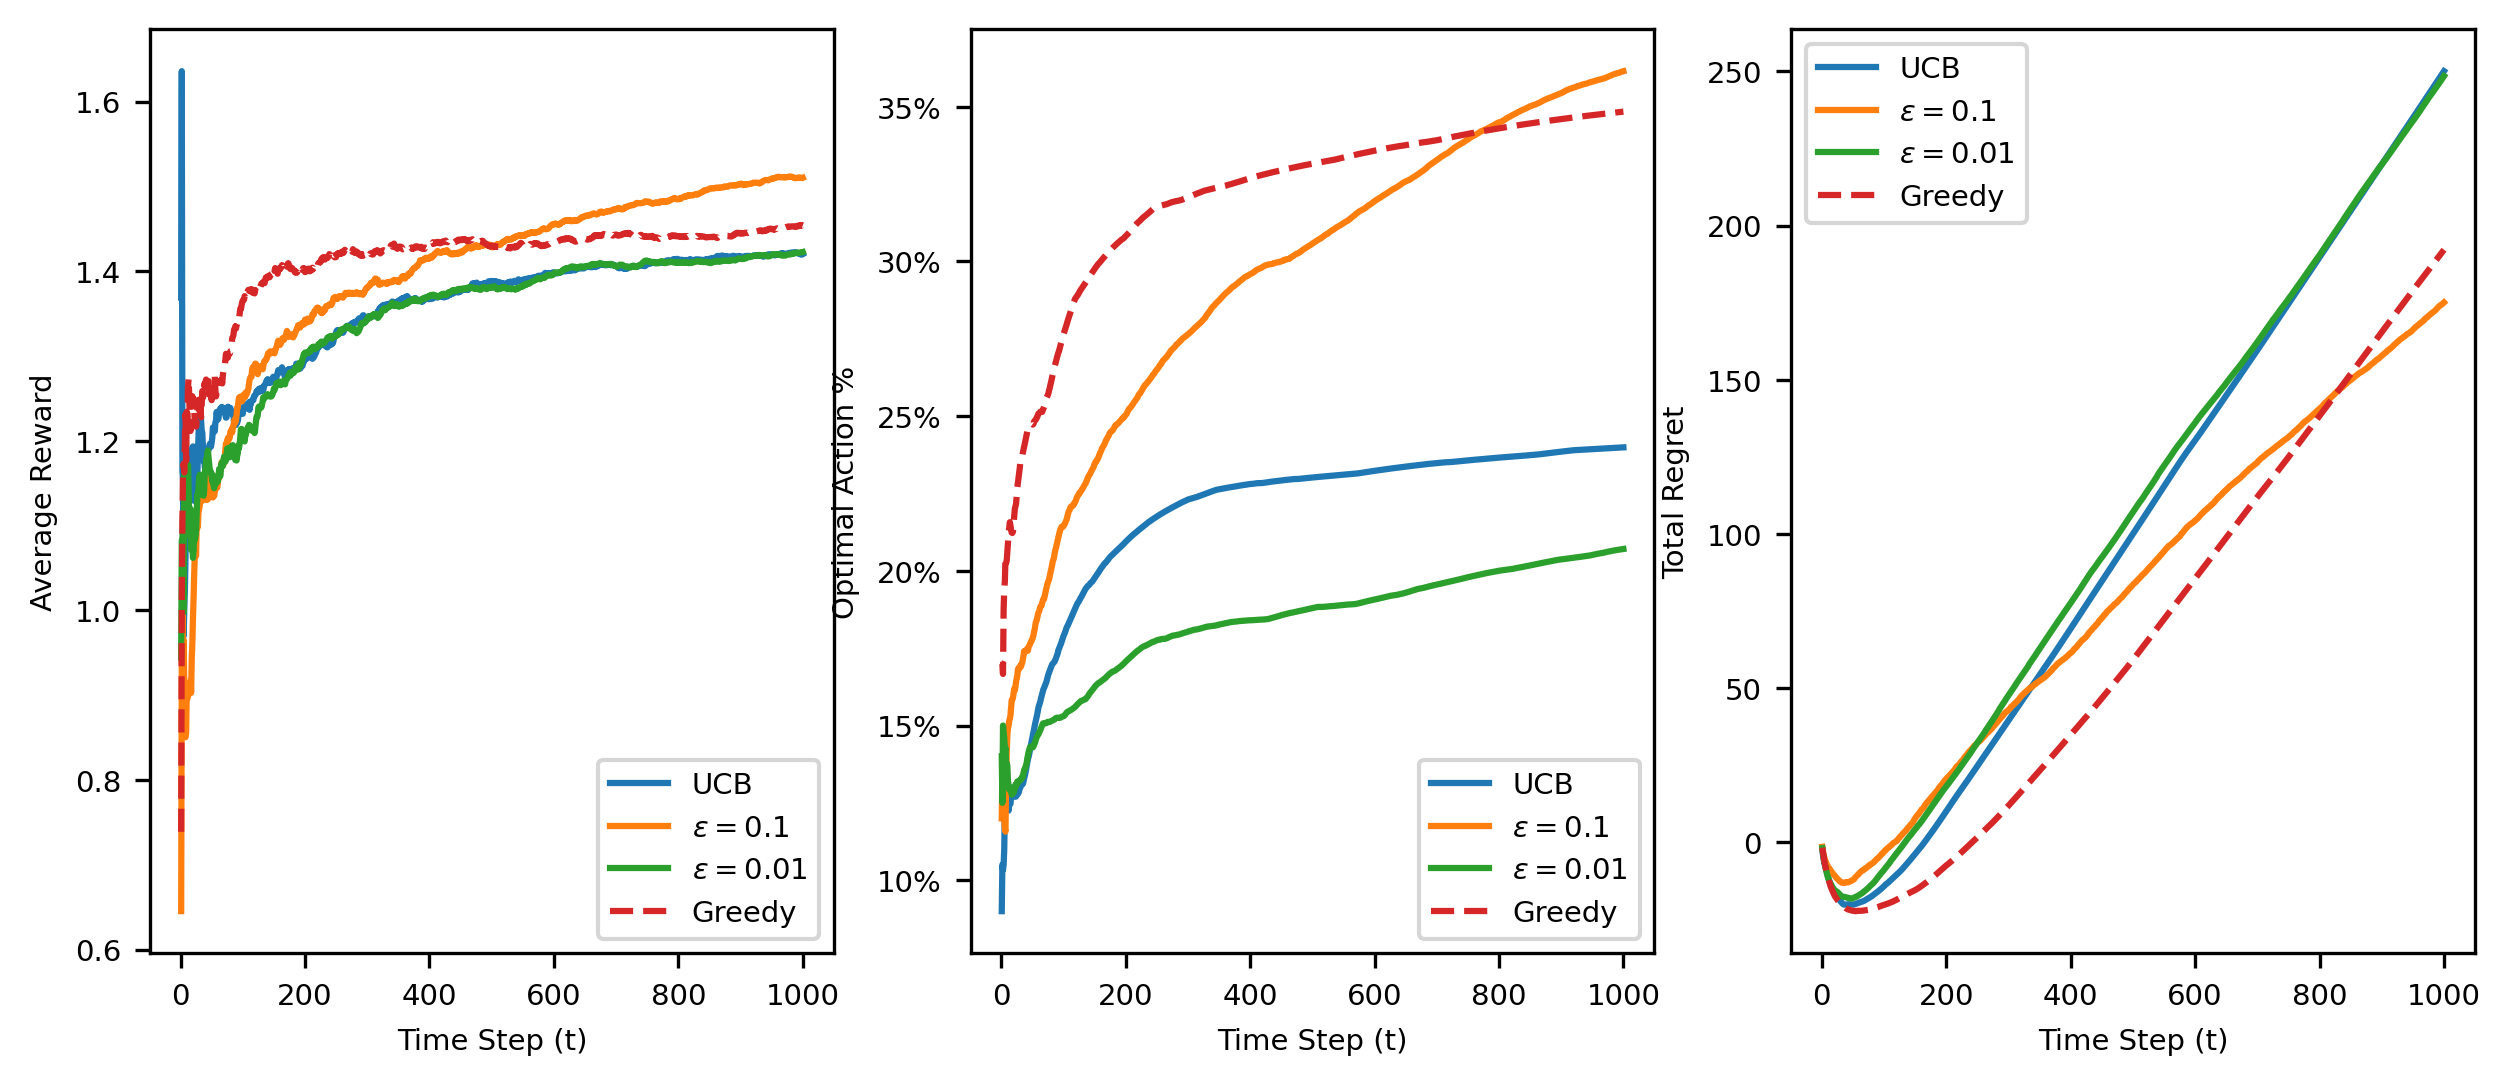

In [18]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, sharey=False, figsize=(10,4))

ax1.plot(range(1,time_horizon+1), ucb['average_reward'], label='UCB')
ax1.plot(range(1,time_horizon+1), metrics1['average_reward'], label='$\epsilon=0.1$')
ax1.plot(range(1,time_horizon+1), metrics2['average_reward'], label='$\epsilon=0.01$')
ax1.plot(range(1,time_horizon+1), greedy['average_reward'], linestyle = '--', label='Greedy')
ax1.set_ylabel('Average Reward')
ax1.set_xlabel('Time Step (t)')

ax2.plot(range(1,time_horizon+1), ucb['optimal_action'], label='UCB')
ax2.plot(range(1,time_horizon+1), metrics1['optimal_action'], label='$\epsilon=0.1$')
ax2.plot(range(1,time_horizon+1), metrics2['optimal_action'], label='$\epsilon=0.01$')
ax2.plot(range(1,time_horizon+1), greedy['optimal_action'], linestyle = '--', label='Greedy')
ax2.set_ylabel('Optimal Action %')
ax2.set_xlabel('Time Step (t)')
ax2.yaxis.set_major_formatter(mtick.PercentFormatter(1, decimals = 0))

ax3.plot(range(1,time_horizon+1), ucb['total_regret'], label='UCB')
ax3.plot(range(1,time_horizon+1), metrics1['total_regret'], label='$\epsilon=0.1$')
ax3.plot(range(1,time_horizon+1), metrics2['total_regret'], label='$\epsilon=0.01$')
ax3.plot(range(1,time_horizon+1), greedy['total_regret'], linestyle = '--', label='Greedy')
ax3.set_ylabel('Total Regret')
ax3.set_xlabel('Time Step (t)')

ax1.legend()
ax2.legend()
ax3.legend()
plt.show()

In [15]:
mab.actual_distribution_parameters

{0: {'loc': 1.3399686719459372, 'scale': 2.711977070786068},
 1: {'loc': 1.1024609948122464, 'scale': 3.4518012959987714},
 2: {'loc': 0.7356102205319576, 'scale': 2.6779483945082325},
 3: {'loc': -0.24540410689405268, 'scale': 2.0127418926582705},
 4: {'loc': 0.9723307806322175, 'scale': 2.8667791475006488},
 5: {'loc': 0.18247543553332513, 'scale': 3.6764554245928194},
 6: {'loc': 0.42766018197191613, 'scale': 2.487654022222939},
 7: {'loc': 0.9768620171335285, 'scale': 4.621135574644896},
 8: {'loc': 0.6817870059734488, 'scale': 2.905360060407031},
 9: {'loc': 1.507145541677384, 'scale': 2.4554382262524754}}

In [16]:
mab.estimated_values, np.argmax(mab.estimated_values)

(array([ 0.59003281,  0.63552346,  0.63261843, -1.3294841 ,  0.79204016,
        -0.30923338, -1.25960915, -2.05343941,  0.5225903 ,  1.50368998]),
 9)

In [17]:
mab.ucb_score

array([ 0.74896986,  0.7859417 ,  0.74694745, -0.9911267 ,  0.79204016,
       -0.05738553, -1.25960915, -2.05343941,  0.73072844,  1.52484165])